### Nabin Gangtan Lama st125985

## Importing necessary library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [10]:
import sklearn
print(sklearn.__version__)

1.7.1


In [11]:
# Checking the version of imported library
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.26.4', '1.5.3', '0.12.2', '3.7.2')

### Loading datasets and checking basic information of dataset

In [12]:
# Loading the Cars.csv Data sets
df= pd.read_csv('Cars.csv')

In [13]:
# Displaying first five samples
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [14]:
# Checking the shape that number of sample size and features
df.shape

(8128, 13)

In [15]:
# Checking datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [16]:
# Checking the nan values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## Some preprocessing being done as A1 Car Price Prediction


In [17]:
# Column owner has different categories, so before mapping, checking the categories in owner columna
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [18]:
# creating a dictionary mapping and mapping the owner column.
mapping = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df['owner']= df['owner'].map(mapping)

In [19]:
# Verifying the owner category 
df['owner'].value_counts()

1    5289
2    2105
3     555
4     174
5       5
Name: owner, dtype: int64

In [20]:
# for feautre fuel, remove all rows with CNG and LPG. Before that lets check the categori in the feature fuel
df['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [21]:
# Selecting the rows of feature fuel that does not contain CNG and LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [22]:
# Removing the kmpl fromt the feature mileage and converting the object data types to the float.
df['mileage']= df['mileage'].str.split().str[0].astype(float)

In [23]:
# Verifying the feature mileage and its object types
df['mileage'].head(3)

0    23.40
1    21.14
2    17.70
Name: mileage, dtype: float64

In [24]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['engine']= df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [25]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['max_power']= df['max_power'].str.split().str[0].astype(float)
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [26]:
# As mentioned brand, lets change the feature name to brand
df =df.rename(columns={'name':'brand'})

In [27]:
# Taking only the first word of the brand
df['brand']=df['brand'].str.split().str[0]

In [28]:
# verifying the df
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [29]:
# Droping the feature torque because it is no longer needed 
df = df.drop(columns='torque')

In [30]:
# verifying the all torque removed or not
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [31]:
# removing Test Drive Cars from the which was mapped to 5 in the owner feature
df =df[df['owner'] !=5]


In [32]:
# verifying Onwer
df['owner'].unique()

array([1, 2, 3, 4])

In [33]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [34]:
# Another way of checking the all Column along with its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


## Performing EDA

In [35]:
## Univariate Analyis
num_feature = df.select_dtypes(include=['int64','float64'])
cat_feature = df.select_dtypes(exclude=['int64','float64'])

<Axes: xlabel='mileage', ylabel='Count'>

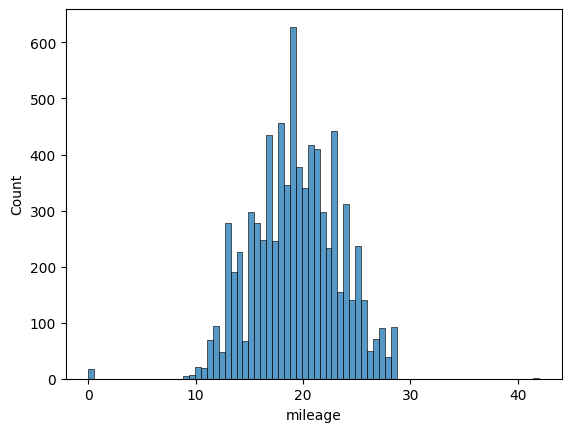

In [36]:
# Performing Univariate Analysis

sns.histplot(data= df, x= 'mileage')


<Axes: xlabel='selling_price', ylabel='Count'>

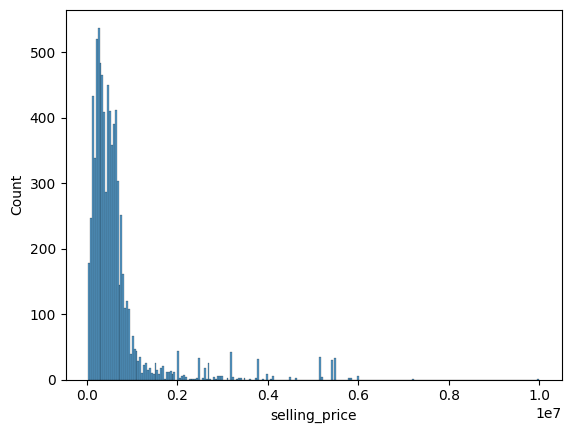

In [37]:
# Histogram of Selling Price
sns.histplot(data= df, x= 'selling_price')


<Axes: xlabel='fuel', ylabel='count'>

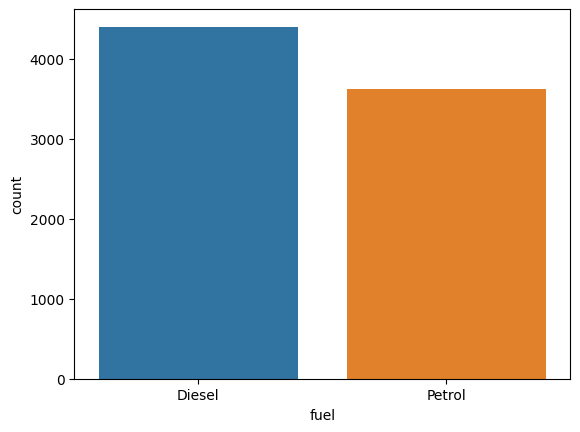

In [38]:
# Countplot of Fuel
sns.countplot(data= df, x= 'fuel')


<Axes: xlabel='seller_type', ylabel='count'>

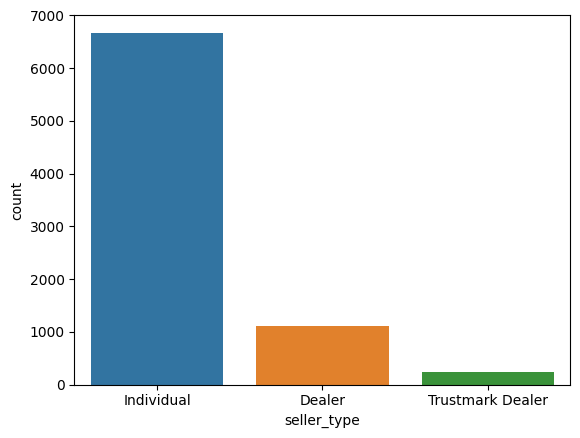

In [39]:
# graph of Selling type

sns.countplot(data= df, x= 'seller_type')


<Axes: xlabel='transmission', ylabel='count'>

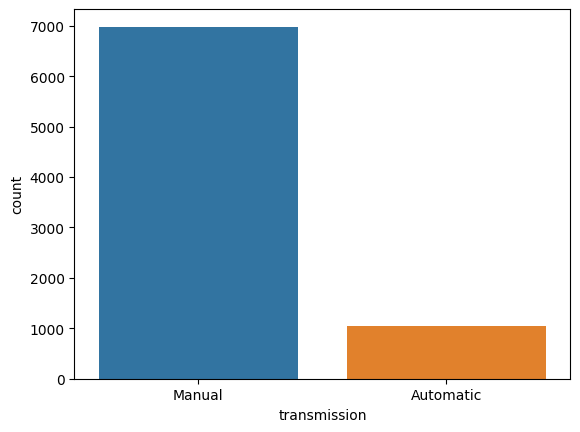

In [40]:
sns.countplot(data= df, x= 'transmission')


<Axes: xlabel='owner', ylabel='count'>

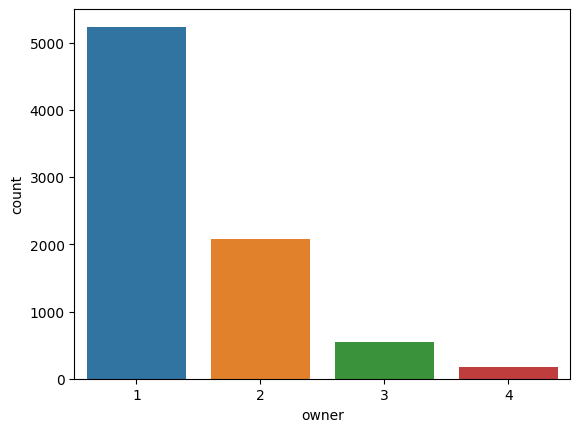

In [41]:
sns.countplot(data= df, x='owner')


<Axes: xlabel='engine', ylabel='Count'>

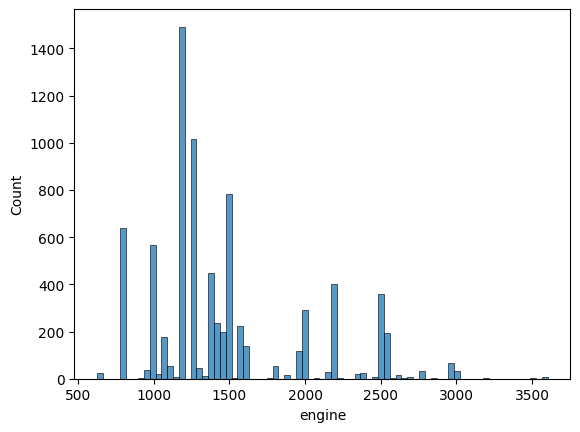

In [42]:
sns.histplot(data= df, x= 'engine')


<Axes: xlabel='max_power', ylabel='Count'>

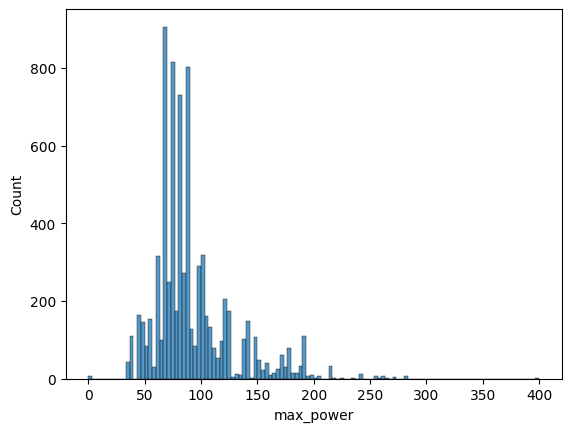

In [43]:
sns.histplot(data= df, x= 'max_power')


<Axes: xlabel='seats', ylabel='Count'>

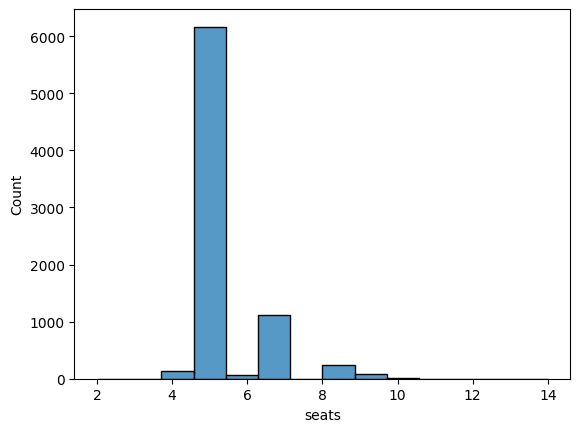

In [44]:
sns.histplot(data= df, x= 'seats')

### Bivariate Analysis

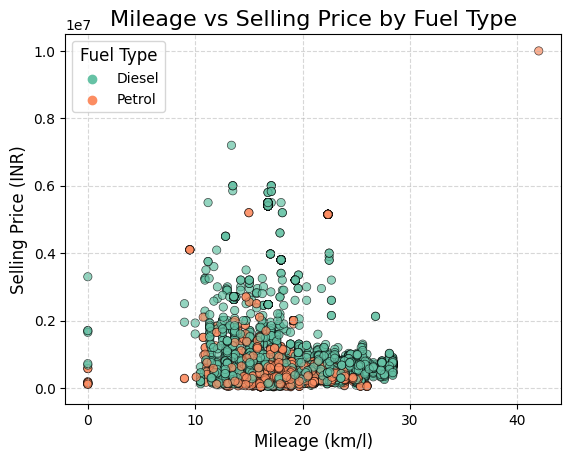

In [45]:
# sns.scatterplot(data = df,x='mileage', y= df['selling_price'], hue='fuel')
sns.scatterplot(data=df, x='mileage', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Mileage vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Mileage (km/l)", fontsize=12)
plt.ylabel("Selling Price (INR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


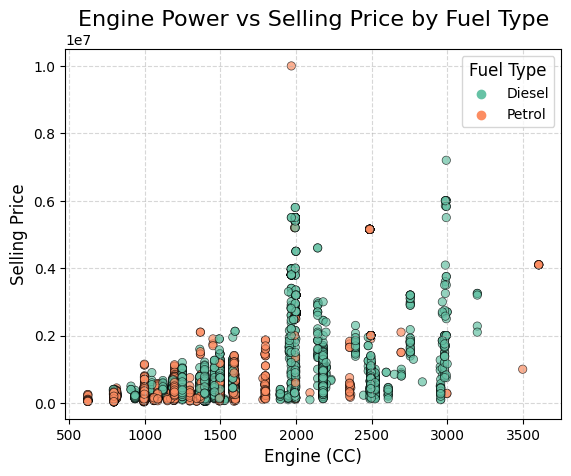

In [46]:
sns.scatterplot(data=df, x='engine', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Engine Power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Engine (CC)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

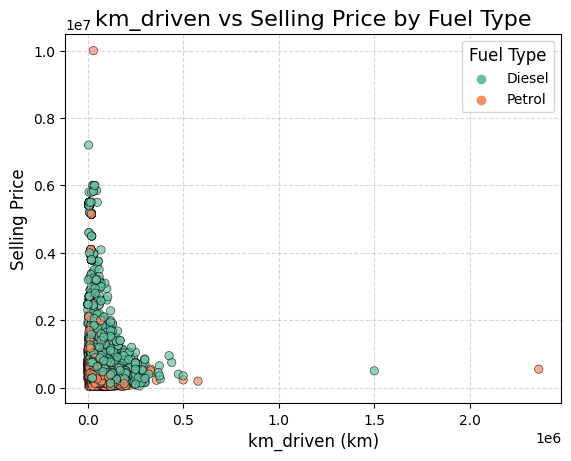

In [47]:
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("km_driven vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("km_driven (km)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


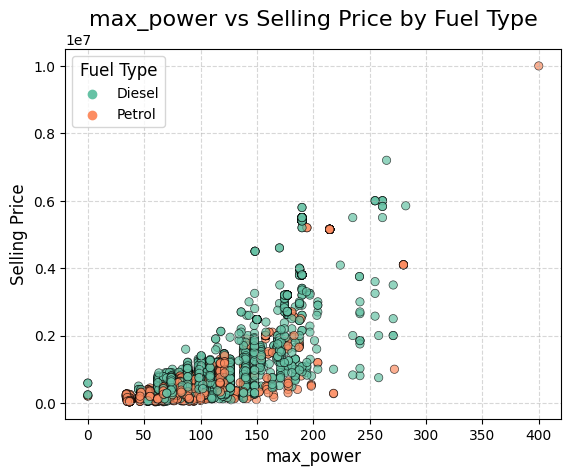

In [48]:
sns.scatterplot(data=df, x='max_power', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("max_power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("max_power", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


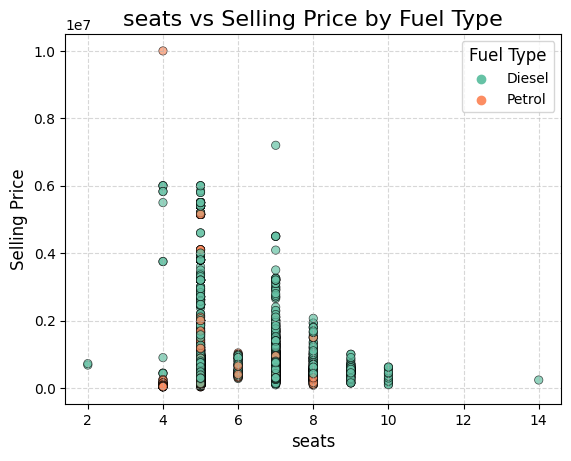

In [49]:
sns.scatterplot(data=df, x='seats', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("seats", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

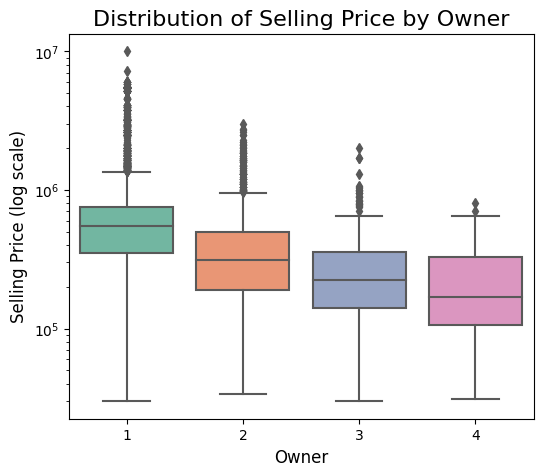

In [50]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by Owner", fontsize=16)
plt.xlabel("Owner", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12)
plt.show()


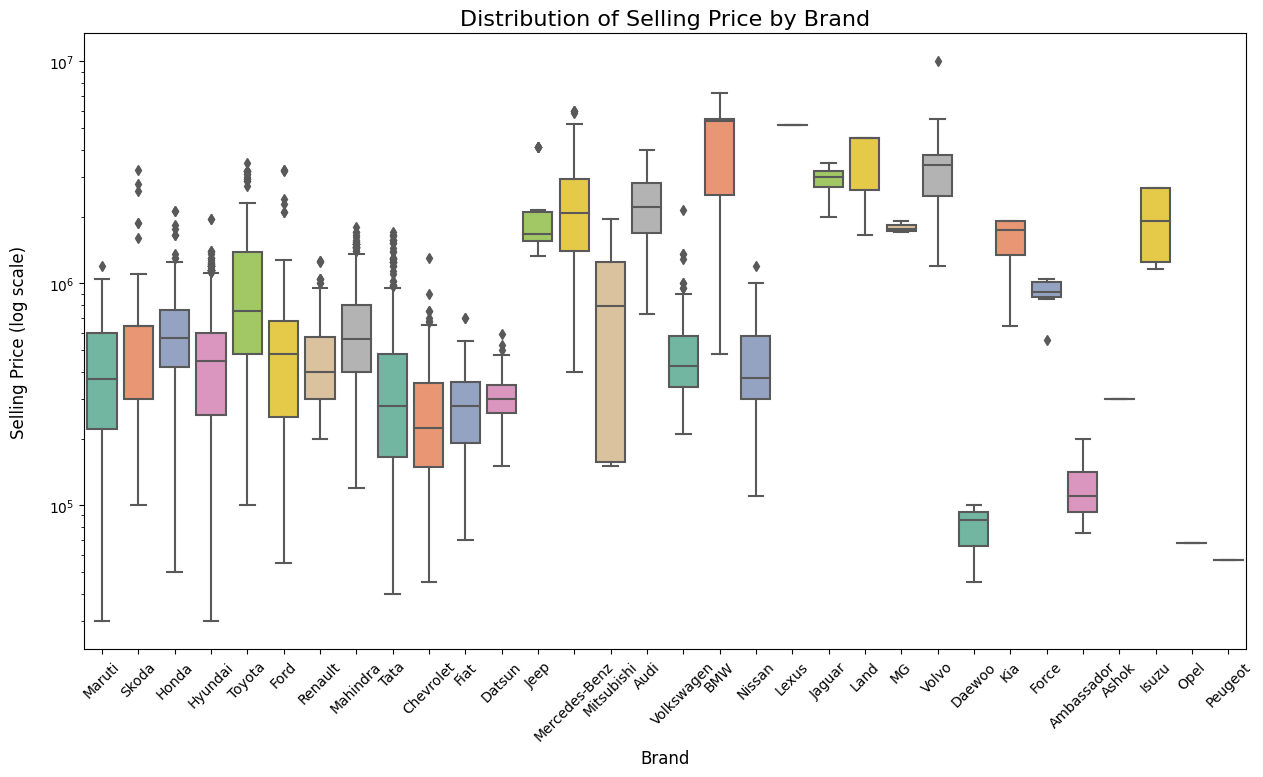

In [51]:
plt.figure(figsize=(15,8))  # make wider for readability
sns.boxplot(data=df, x='brand', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12, rotation=90, labelpad=15)  # vertical label with padding
plt.xticks(rotation=45)  # rotate x-axis labels if too crowded
plt.show()

In [52]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

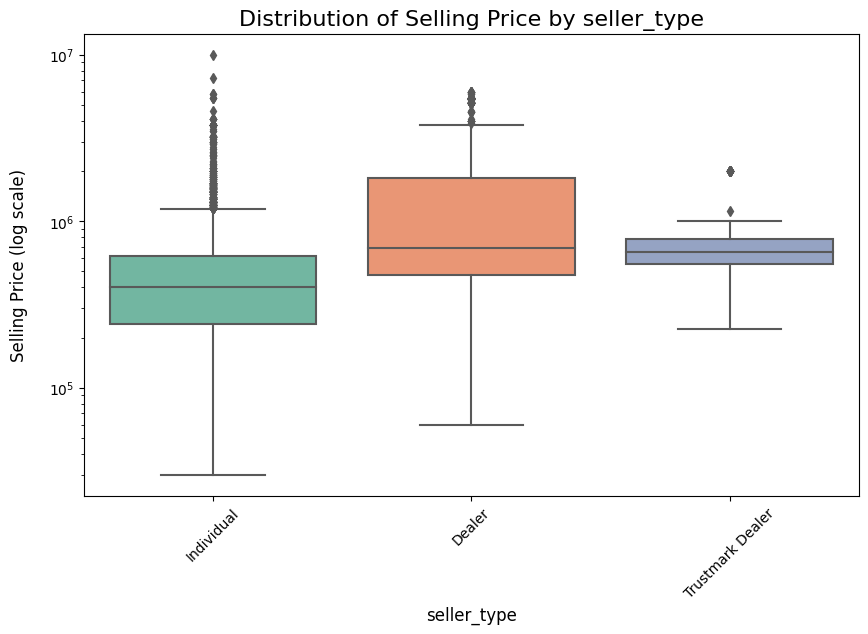

In [53]:
plt.figure(figsize=(10,6))  # make wider for readability
sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by seller_type", fontsize=16)
plt.xlabel("seller_type", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12, rotation=90, labelpad=15)  # vertical label with padding
plt.xticks(rotation=45)  # rotate x-axis labels if too crowded
plt.show()

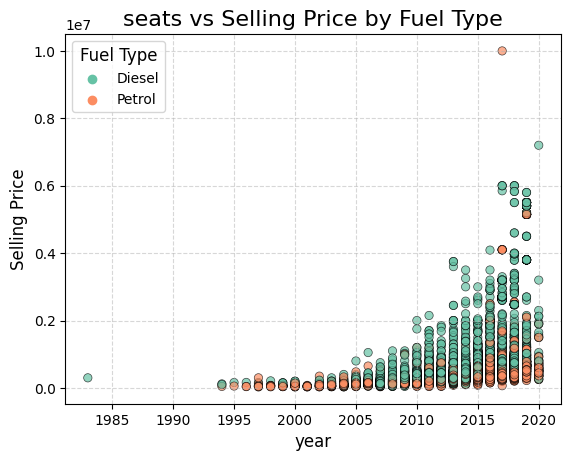

In [54]:
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("year", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

In [55]:
# Label Encoding Because I need to show the correlation
from sklearn.preprocessing import LabelEncoder
# brand_encoder = LabelEncoder()
# df['brand'] = brand_encoder.fit_transform(df['brand'])

fuel_encoder = LabelEncoder()
df['fuel'] = fuel_encoder.fit_transform(df['fuel'])

seller_type_encoder = LabelEncoder()
df['seller_type'] = seller_type_encoder.fit_transform(df['seller_type'])

transmission_encoder = LabelEncoder()
df['transmission'] = transmission_encoder.fit_transform(df['transmission'])





In [56]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [57]:
df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

/tmp/ipykernel_12/714968004.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


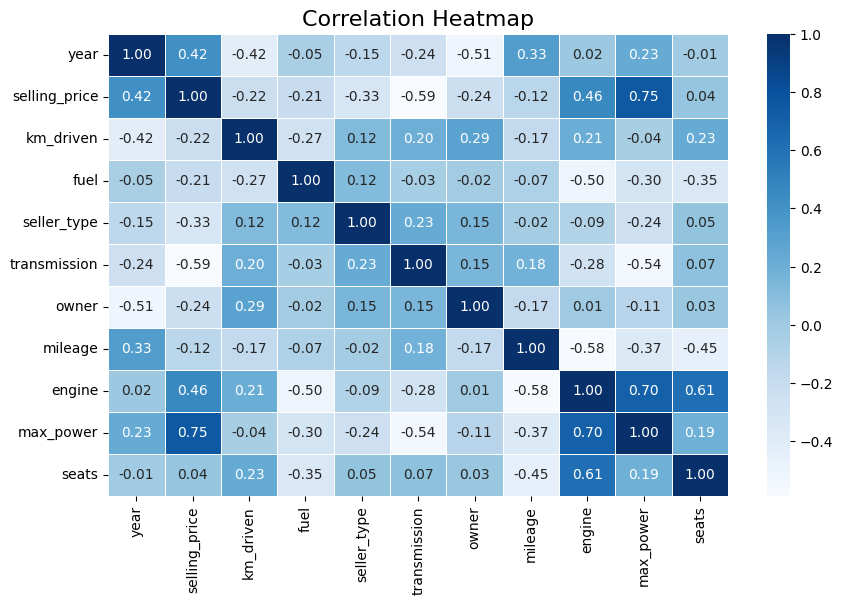

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(),
    annot=True,          # show correlation numbers
    fmt=".2f",           # format decimals
    cmap="Blues",        # color map
    linewidths=0.5       # grid lines between cells
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [59]:
# Now I am splitting the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X = df.drop(columns='selling_price')
y = np.log(df['selling_price'])
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [60]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [61]:
# Checking the missing Values of X_train
X_train.isnull().sum()

brand             0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         171
engine          171
max_power       165
seats           171
dtype: int64

In [62]:
# Checking the missing Values of X_test
X_test.isnull().sum()

brand            0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         43
engine          43
max_power       43
seats           43
dtype: int64

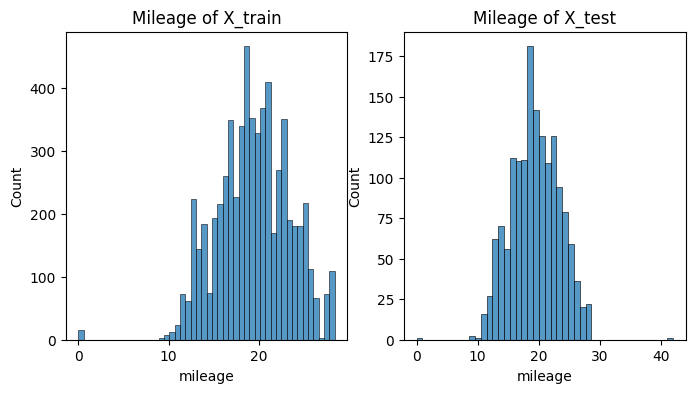

In [63]:
# Filling missing values of Mileasege. Before that lets check the distribution of Mileasege
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x = 'mileage', data = X_train)
plt.title("Mileage of X_train")
plt.subplot(1,2,2)
sns.histplot(x = 'mileage', data = X_test)
plt.title("Mileage of X_test")
plt.show()

In [64]:
# this seams normal distribution, so filling nan values with mean
X_train['mileage'] = X_train['mileage'].fillna(X_train['mileage'].mean())
X_test['mileage'] = X_test['mileage'].fillna(X_test['mileage'].mean())

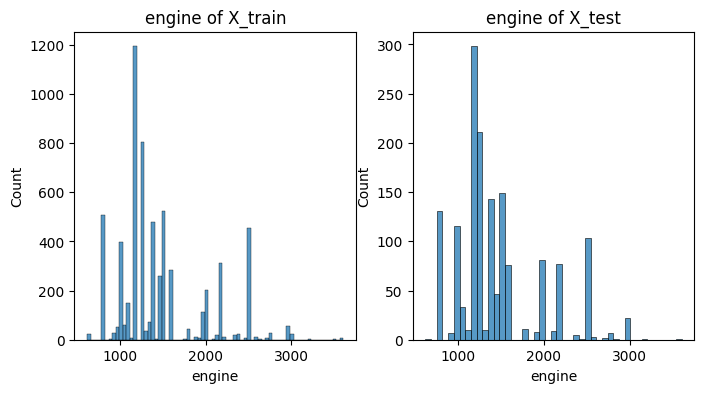

In [65]:
# Filling missing values of Mileasege. Before that lets check the distribution of Mileasege
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x = 'engine', data = X_train)
plt.title("engine of X_train")
plt.subplot(1,2,2)
sns.histplot(x = 'engine', data = X_test)
plt.title("engine of X_test")
plt.show()

In [66]:
# this seams not normal distribution, so filling nan values with mean
X_train['engine'] = X_train['engine'].fillna(X_train['engine'].median())
X_test['engine'] = X_test['engine'].fillna(X_test['engine'].median())

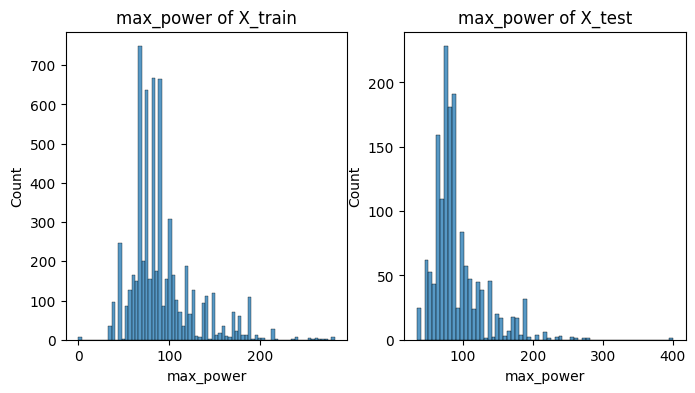

In [67]:
# Filling missing values of Maxpower. Before that lets check the distribution of it. 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x = 'max_power', data = X_train)
plt.title("max_power of X_train")
plt.subplot(1,2,2)
sns.histplot(x = 'max_power', data = X_test)
plt.title("max_power of X_test")
plt.show()

In [68]:
# this seams not normal distribution, so filling nan values with mean
X_train['max_power'] = X_train['max_power'].fillna(X_train['max_power'].median())
X_test['max_power'] = X_test['max_power'].fillna(X_test['max_power'].median())

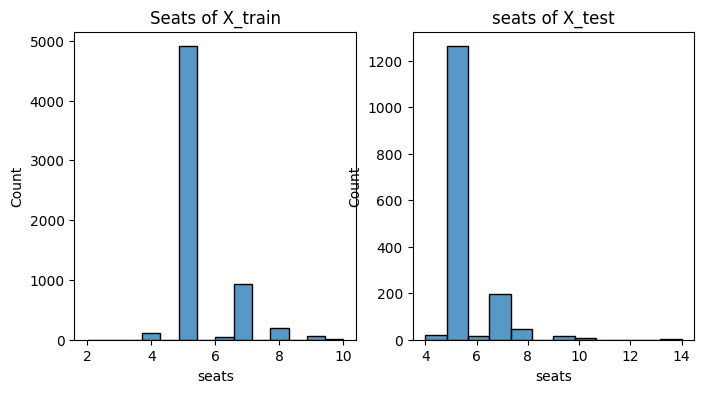

In [69]:
# Filling missing values of Seats. Before that lets check the distribution of it. 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x = 'seats', data = X_train)
plt.title("Seats of X_train")
plt.subplot(1,2,2)
sns.histplot(x = 'seats', data = X_test)
plt.title("seats of X_test")
plt.show()

In [70]:
# this seams not normal distribution, so filling nan values with mean
X_train['seats'] = X_train['seats'].fillna(X_train['seats'].median())
X_test['seats'] = X_test['seats'].fillna(X_test['seats'].median())

In [71]:
X_train.isnull().sum()

brand           0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [72]:
# Since I am going to taking Engine because it is highly correlated with the max_power.
X_train = X_train[['year','max_power','brand','mileage','fuel']]
X_test = X_test[['year','max_power','brand','mileage','fuel']]

In [73]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit only on training set
encoder.fit(X_train[['brand']])

# Transform Brand column
X_train_brand = encoder.transform(X_train[['brand']])
X_test_brand  = encoder.transform(X_test[['brand']])

# Convert to DataFrame
X_train_brand = pd.DataFrame(X_train_brand, 
                             columns=encoder.get_feature_names_out(['brand']),
                             index=X_train.index)

X_test_brand = pd.DataFrame(X_test_brand, 
                            columns=encoder.get_feature_names_out(['brand']),
                            index=X_test.index)

# Replace Brand column with encoded features
X_train = pd.concat([X_train.drop(columns=['brand']), X_train_brand], axis=1)
X_test  = pd.concat([X_test.drop(columns=['brand']), X_test_brand], axis=1)


## Checking outlier

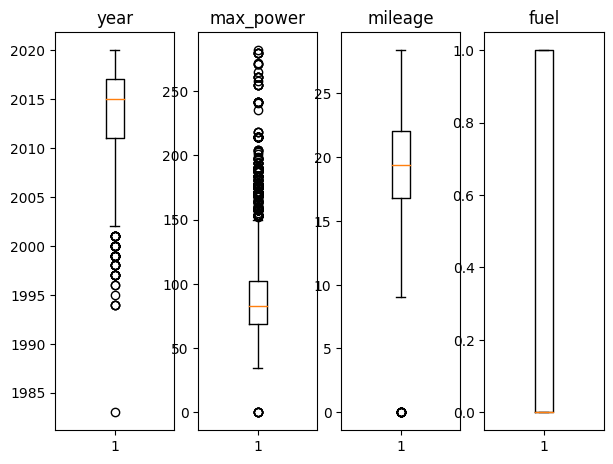

In [74]:
# Creating a dictionary of columns:
col_dict = {"year":1, "max_power":2,"mileage":3,"fuel":4}
# Detecting outliers in each variable using box plots.
plt.figure(figsize=(20, 30))
for variable, i in col_dict.items():
    plt.subplot(5,11, i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

In [75]:
# Defining a function to calculate the outliers in each features as it will decrease data quality in turn the efficiency of our model will also be negatively impacted
def outlier_count(col, data = X_train):
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [76]:

# Printing all the outliers in each of the features
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------brand_Ashok---------------

Number of outliers: 1
Percent of data that is outlier: 0.02%

---------------brand_Audi---------------

Number of outliers: 28
Percent of data that is outlier: 0.44%

---------------brand_BMW---------------

Number of outliers: 90
Percent of data that is outlier: 1.4%

---------------brand_Chevrolet---------------

Number of outliers: 168
Percent of data that is outlier: 2.62%

---------------brand_Daewoo---------------

Number of outliers: 3
Percent of data that is outlier: 0.05%

---------------brand_Datsun---------------

Number of outliers: 49
Percent of data that is outlier: 0.76%

---------------brand_Fiat---------------

Number of outl

In [77]:

# We will do scalling based on the data distribution. Only for numerical
from sklearn.preprocessing import StandardScaler
num_cols = ['max_power','mileage']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [78]:
X_train.head()

,year,max_power,mileage,fuel,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,...,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
2982,2016,-1.088215,1.458607,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2430,2013,-1.258879,0.846119,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6294,2009,-0.247691,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6255,2018,1.772125,-0.449432,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4253,1999,-0.670086,-1.155180,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
year_scaler = StandardScaler()
X_train['year'] = year_scaler.fit_transform(X_train[['year']])
X_test['year'] = year_scaler.transform(X_test[['year']])

In [80]:

# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 33)
Shape of X_test:  (1606, 33)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [81]:

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [82]:
# Modeling

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import pickle



In [83]:
import mlflow
import os

# Set the MLflow tracking URI to the service name and port inside Docker
mlflow.set_tracking_uri("http://mlflow:5000")  

os.environ["LOGNAME"] = "Nabin"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="a2-predicting-car-price")

<Experiment: artifact_location='/mlflow/mlruns/757536943967689613', creation_time=1757757531474, experiment_id='757536943967689613', last_update_time=1757757531474, lifecycle_stage='active', name='a2-predicting-car-price', tags={}>

In [84]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




class LinearRegression(object):
    def __init__(self, regularization, 
                 lr=0.001, method='batch', init='xavier', polynomial=True, degree=3,
                 use_momentum=True, momentum=0.5, num_epochs=100, batch_size=50,
                 cv=None, n_splits=3, shuffle=True, random_state=None):

        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.polynomial = polynomial
        self.degree     = degree
        self.init       = init
        self.use_momentum   = use_momentum
        self.momentum   = momentum
        self.prev_step  = 0
        self.regularization = regularization

        # Cross-validation splitter
        if cv is None:
            self.cv = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
        else:
            self.cv = cv

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2(self, ytrue, ypred):
        return 1 - ((ytrue - ypred) ** 2).sum() / ((ytrue - ytrue.mean()) ** 2).sum()
    def avgMse(self):
        return np.sum(np.array(self.kfold_scores))/len(self.kfold_scores)

    def avgr2(self):
        return np.sum(np.array(self.kfold_r2))/len(self.kfold_r2)
    
    def fit(self, X_train, y_train):

        # self.columns = X_train.
        # Store column names first
        if hasattr(X_train, "columns"):
            self.columns = X_train.columns
        else:
            self.columns = [f"x{i}" for i in range(X_train.shape[1])]

        # Convert to numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()  # flatten target
        
        # Polynomial expansion if needed
        if self.polynomial:
            X_train = self._transform_features(X_train)
            print("Using Polynomial")
        else:
            print("Using Linear")


        self.kfold_scores = list()

        self.kfold_r2 = []
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            #initialize weights using Xavier method
            if self.init == 'xavier':
                #calculate the range for the weights with number of samples
                lower, upper = -(1 / np.sqrt(X_cross_train.shape[1])), 1 / np.sqrt(X_cross_train.shape[1])
                #randomize weights then scale them using lower and upper bounds
                self.theta = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + self.theta * (upper - lower)

            #initialize weights with zero
            elif self.init == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])

            else:
                print("Wrong weights init method. Must be either 'xavier' or 'zero'")
                return
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {
                    "method": self.method,
                    "lr": self.lr,
                    "reg": type(self).__name__
                }
                
                mlflow.log_params(params=params)
        
                for epoch in range(self.num_epochs):                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)                    
    
                    yhat_val = self._predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2_new = self.r2(y_cross_val, yhat_val)
                        
                        #record dataset
                    mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    mlflow.log_input(mlflow_train_data, context="training")
                    
                    mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    mlflow.log_input(mlflow_val_data, context="validation")
                    
                    # early stopping
                    
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2_new)
                print(f"Fold {fold}: MSE {val_loss_new}")
                print(f"Fold {fold}:R2 {val_r2_new}")

    
    def _transform_features(self, X):
        # ensure X is numpy array
        X = np.array(X)
        return X ** self.degree
            
                    
    def _train(self, X, y):
        yhat = self._predict(X)
        m    = X.shape[0]    
        if self.regularization:    
            grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        else:
            grad = (1/m) * X.T @(yhat - y)

        if self.use_momentum == True:
            self.prev_step = self.momentum * self.prev_step - self.lr * grad
            self.theta = self.theta + self.prev_step
        else:
            self.theta = self.theta - self.lr * grad

        return self.mse(y, yhat)
    
    def _predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def predict(self, X):
        if self.polynomial == True:
            X = self._transform_features(X)
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]

    def feature_importance(self, width=5, height=10):
        coefs = pd.DataFrame(data=self.theta, columns=['Coefficients'], index=self.columns)
        coefs.plot(kind="barh", figsize=(width, height))
        plt.title("Feature Importance")
        plt.show()



In [85]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)

# Define classes for Lasso, Ridge, ElasticNet, and Normal (No Regularization) linear regression
class Lasso(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Ridge(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class ElasticNet(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Normal(LinearRegression):  
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = None  # No regularization
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

In [86]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)


In [87]:
regs = ["Ridge", "Lasso", "ElasticNet"]

# Looping through all regression methods
for reg in regs:
    #Hard quoting other params
    params = {"method": "batch", "l": 0.1, "lr": 0.1,  "polynomial": True, "init" :"xavier", 
    "use_momentum" :True,  "momentum":0.5, "degree":3}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
    print("="*5, reg, "="*5)

    #Specifying the type of regression and setting up the model based on it
    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
    #Passing the params 
    model = type_of_regression(**params)
    #Fitting the model
    model.fit(X_train, y_train)
    #Calculating avgMse and r2 for the speicified params
    mse = model.avgMSE()
    r2 = model.avgr2()
    

    #Predicting using the model
    yhat = model.predict(X_train)    
    
    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE 1.147251717154585e+171
Fold 0:R2 -1.5938173438203195e+171


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipykernel_12/875991495.py:34: RuntimeWarning: overflow encountered in square
  return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
/tmp/ipykernel_12/875991495.py:37: RuntimeWarning: overflow encountered in square
  return 1 - ((ytrue - ypred) ** 2).sum() / ((ytrue - ytrue.mean()) ** 2).sum()


Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf
===== Lasso =====
Using Polynomial
Fold 0: MSE 1.721405803175188e+186
Fold 0:R2 -2.4889191136768205e+186
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf
===== ElasticNet =====
Using Polynomial
Fold 0: MSE 4.89086413973408e+174
Fold 0:R2 -7.140134508177929e+174
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf


In [88]:
#Experiment

In [88]:
# Settting up the experiment of polynomial and regularization type all others are hard quoted
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]

for reg in regs:
    for t in ispoly:

        params = {"method": "batch","polynomial": t,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
        "degree":3, "use_momentum" :True,  "momentum":0.5}
        # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
        
        print("="*5, reg, "="*5)

        type_of_regression = str_to_class(reg)   
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_train)
        mse = model.avgMSE()
        r2 = model.avgr2()
        

        print("Test MSE: ", mse)
        print("Test R2: ", r2)

        mlflow.log_metric(key="test_mse", value=mse)
        mlflow.log_metric(key="test_r2", value=r2)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE 8.939385571504022e+181
Fold 0:R2 -1.2407057372973429e+182


/tmp/ipykernel_12/875991495.py:34: RuntimeWarning: overflow encountered in square
  return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
/tmp/ipykernel_12/875991495.py:37: RuntimeWarning: overflow encountered in square
  return 1 - ((ytrue - ypred) ** 2).sum() / ((ytrue - ytrue.mean()) ** 2).sum()


Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf
===== Ridge =====
Using Linear
Fold 0: MSE 4.863774089743964
Fold 0:R2 -6.137134412340607
Fold 1: MSE 4.677122102131124
Fold 1:R2 -5.936228738398365
Fold 2: MSE 4.540013941317973
Fold 2:R2 -5.108369548818319
Test MSE:  4.693636711064354
Test R2:  -5.727244233185764
===== Lasso =====
Using Polynomial
Fold 0: MSE 9.876866959053262e+175
Fold 0:R2 -1.4388022540245333e+176
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf
===== Lasso =====
Using Linear
Fold 0: MSE 0.15632382900334413
Fold 0:R2 0.781012020119967
Fold 1: MSE 0.1407619723132705
Fold 1:R2 0.7917338546002083
Fold 2: MSE 0.14699518842482542
Fold 2:R2 0.7923770856934219
Test MSE:  0.14802699658048002
Test R2:  0.7883743201378657
===== ElasticNet =====
Using Polynomial
Fold 0: MSE 4.313118074415283e+185
Fold 0:R2 -6.471975126631231e+185
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Te

In [89]:
reg = "Normal"
ispoly= False
# Only testing with the method here
methods=["mini","batch","sto"]

for method in methods:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
    "degree":3, "use_momentum" :True,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Using Linear
Fold 0: MSE 0.07088438437260969
Fold 0:R2 0.8947266433227847
Fold 1: MSE 0.0709927747425434
Fold 1:R2 0.904298360321766
Fold 2: MSE 0.07474442812490464
Fold 2:R2 0.8906607450668487
Test MSE:  0.07220719574668591
Test R2:  0.8965619162371331
===== Normal =====
Method:  batch
Using Linear
Fold 0: MSE 0.20799000685630387
Fold 0:R2 0.7030528883814717
Fold 1: MSE 0.17577082028621757
Fold 1:R2 0.734987574308025
Fold 2: MSE 0.19717021155471195
Fold 2:R2 0.7318976329343793
Test MSE:  0.19364367956574446
Test R2:  0.723312698541292
===== Normal =====
Method:  sto
Using Linear
Fold 0: MSE 0.15877656782929475
Fold 0:R2 0.771103224802952
Fold 1: MSE 0.1365405131081668
Fold 1:R2 0.793714442027981
Fold 2: MSE 0.33013761991391694
Fold 2:R2 0.5558625413119005
Test MSE:  0.20848490028379282
Test R2:  0.7068934027142779


In [91]:
reg = "Normal"
ispoly= False
method="sto"
# Only testing with/without momentum here
momentums =[True, False]

for momentum in momentums:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.01, "init" :"xavier", 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}", nested=True)    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", "Xavier")
    print("Learning Rate: ", "0.1")
    print("="*10)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  sto
Momentum:  True
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.2569800366093232
Fold 0:R2 0.6151970830156579
Fold 1: MSE 0.14417428436666355
Fold 1:R2 0.795126278694634
Fold 2: MSE 0.24918265308307694
Fold 2:R2 0.6571293324430244
Test MSE:  0.21677899135302126
Test R2:  0.6891508980511055
===== Normal =====
Method:  sto
Momentum:  False
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.08227029218030142
Fold 0:R2 0.8781392422627228
Fold 1: MSE 0.12193266985420208
Fold 1:R2 0.8269602717349737
Fold 2: MSE 0.0901592646197757
Fold 2:R2 0.8745973358742711
Test MSE:  0.09812074221809307
Test R2:  0.8598989499573225


In [90]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
# Only testing diff initialization here
inits=["zero",'xavier']

for init in inits:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", "0.1")
    print("="*10)
    type_of_regression = str_to_class(reg)   
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()
    print("Test MSE: ", mse)
    print("Test R2: ", r2)
    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  zero
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.0721909643952624
Fold 0:R2 0.8915676760370809
Fold 1: MSE 0.06605440309206048
Fold 1:R2 0.9072704044743369
Fold 2: MSE 0.07898990628682961
Fold 2:R2 0.8898255401994253
Test MSE:  0.0724117579247175
Test R2:  0.8962212069036144
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.07080231949680112
Fold 0:R2 0.9034541653549906
Fold 1: MSE 0.06843939256186021
Fold 1:R2 0.9019328436073232
Fold 2: MSE 0.0773450959206646
Fold 2:R2 0.8841831889096575
Test MSE:  0.0721956026597753
Test R2:  0.896523399290657


In [93]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
init='xavier'
# Only testing diff learning rate here
lrs =[0.01,0.001,0.0001]

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.01
Using Linear
Fold 0: MSE 0.08621000149202161
Fold 0:R2 0.8826217444086343
Fold 1: MSE 0.07627901104573706
Fold 1:R2 0.887942815789666
Fold 2: MSE 0.06938067811030316
Fold 2:R2 0.8983855256090262
Test MSE:  0.07728989688268727
Test R2:  0.8896500286024422
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.001
Using Linear
Fold 0: MSE 0.12574891049162487
Fold 0:R2 0.8208106568605188
Fold 1: MSE 0.11744306886152951
Fold 1:R2 0.834182611171607
Fold 2: MSE 0.11893057375738764
Fold 2:R2 0.8274012676731022
Test MSE:  0.12070751770351401
Test R2:  0.827464845235076
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.0001
Using Linear
Fold 0: MSE 1.5308040852064702
Fold 0:R2 -1.2439799596838395
Fold 1: MSE 1.573617825443187
Fold 1:R2 -1.2509813400511387
Fold 2: MSE 1.4416407961867417
Fold 2:R2 -1.0085235513738309
Test 

In [ ]:
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]
lrs=[0.01,0.001,0.0001]
methods = ["sto","mini","batch"]
inits =['zero','xavier']
use_momentums =[True, False]
momentum =""
for reg in regs:
    print("="*5, reg, "="*5)
    for method in methods:
        print("="*5, method, "="*5)
        for t in ispoly:
            if t==True:
                print("Polynomial")
            else:
                print("Linear")
            for init in inits:
                print("="*5, init, "="*5)
                for use_momentum in use_momentums:
                    if(use_momentum== True):
                         momentum = "Momentum Used"
                    else:
                        momentum ="Momentum not used"
                    print("="*5, momentum, "="*5)
                    for lr in lrs:
                        print("="*5, lr, "="*5)
                        params = {"method": method,"polynomial": t,  "lr": lr, "l": 0.1, "init" :init, 
                        "degree":3, "use_momentum" :use_momentum,  "momentum":0.5}
                        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)                                            
                        type_of_regression = str_to_class(reg)    
                        model = type_of_regression(**params)  
                        model.fit(X_train, y_train)
                        yhat = model.predict(X_train)
                        mse = model.avgMSE()
                        r2 = model.avgr2()

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)

                        mlflow.log_metric(key="test_mse", value=mse)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


                        mlflow.end_run()

===== Ridge =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial


/tmp/ipykernel_24/1302772216.py:34: RuntimeWarning: overflow encountered in square
  return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
/tmp/ipykernel_24/1302772216.py:37: RuntimeWarning: overflow encountered in square
  return 1 - ((ytrue - ypred) ** 2).sum() / ((ytrue - ytrue.mean()) ** 2).sum()


Fold 0: MSE inf
Fold 0:R2 -inf


/tmp/ipykernel_24/1302772216.py:165: RuntimeWarning: overflow encountered in matmul
  grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
/tmp/ipykernel_24/1302772216.py:165: RuntimeWarning: invalid value encountered in matmul
  grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
/tmp/ipykernel_24/1302772216.py:170: RuntimeWarning: invalid value encountered in subtract
  self.prev_step = self.momentum * self.prev_step - self.lr * grad
/tmp/ipykernel_24/1302772216.py:178: RuntimeWarning: invalid value encountered in matmul
  return X @ self.theta  #===>(m, n) @ (n, )


Fold 1: MSE nan
Fold 1:R2 nan
Fold 2: MSE nan
Fold 2:R2 nan
Test MSE:  nan
Test R2:  nan
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 23.83027740300352
Fold 0:R2 -33.39681032706127
Fold 1: MSE 13.92733016383225
Fold 1:R2 -19.134110565628866
Fold 2: MSE 19.275737639034947
Fold 2:R2 -26.01449544030174
Test MSE:  19.01111506862357
Test R2:  -26.181805444330625
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  inf
Test R2:  -inf
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 5.809912105206442
Fold 0:R2 -7.230087263888812
Fold 1: MSE 5.502159762201299
Fold 1:R2

/tmp/ipykernel_24/1302772216.py:173: RuntimeWarning: invalid value encountered in subtract
  self.theta = self.theta - self.lr * grad


Fold 0: MSE nan
Fold 0:R2 nan
Fold 1: MSE inf
Fold 1:R2 -inf
Fold 2: MSE inf
Fold 2:R2 -inf
Test MSE:  nan
Test R2:  nan
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
Fold 1: MSE inf
Fold 1:R2 -inf


## Grid Search ( cross validation to observe all the models and their effciency).

### This includes methods such as Ridge, Lasso, ElasticNet, and Normal regression, applied for both polynomial and linear testing. The evaluation is conducted using mini-batch, batch, and stochastic approaches, with learning rates of 0.01, 0.001, and 0.0001.


In [79]:
reg = "Normal"
ispoly= False
method="sto"
momentum =True
init='xavier'
lrs =[0.01]

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method:", method)
    print("Polynomial: ", ispoly)
    print("Momentun: ", momentum)
    print("Initialization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse  = model.mse(yhat, y_test)
    r2 = model.r2(yhat, y_test)

    print("Best MSE: ", mse)
    print("Best R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


    # #######
    mlflow.end_run()

===== Normal =====
Method: sto
Polynomial:  False
Momentun:  True
Initialization:  xavier
Learning Rate:  0.01
Using Linear
Fold 0: MSE 0.07557292060638379
Fold 0:R2 0.8949467391776084
Fold 1: MSE 0.0747338550664079
Fold 1:R2 0.8936177217926385
Fold 2: MSE 0.071872800409277
Fold 2:R2 0.8937230499968964
Best MSE:  0.07128131794823125
Best R2:  0.881899161007068


### Feature Importance

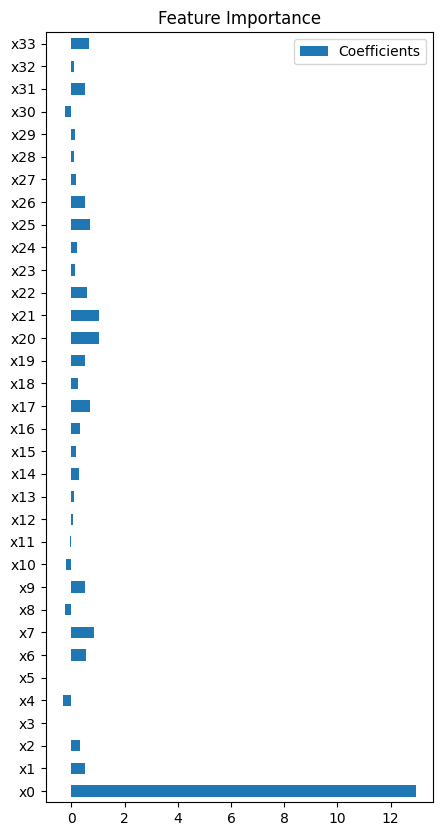

In [81]:
model.feature_importance()

In [81]:
import pickle

# save the model to disk
filename = 'Model/a2-car-price-prediction.model'
pickle.dump(model, open(filename, 'wb'))

fuel_path = 'Model/brand-fuel.model'
pickle.dump(fuel_encoder,open(fuel_path,'wb'))
# save the scaler to disk
scaler_path = 'Model/a2-mileage-max-power-scalar.model'
pickle.dump(scaler, open(scaler_path, 'wb'))

# save the year_scaler to disk
scaler_path = 'Model/a2-year-scalar.model'
pickle.dump(year_scaler, open(scaler_path, 'wb'))
# Path to save
brand_enc_path = "Model/car-brand-encoder.pkl"

# Save encoder
with open(brand_enc_path, "wb") as f:
    pickle.dump(encoder, f)

In [98]:
import pickle

# Paths to the new model components
new_model_path = 'Model/a2-car-price-prediction.model'
fuel_path = 'Model/brand-fuel.model'
milage_max_scaler_path  = 'Model/a2-mileage-max-power-scalar.model'
brand_encoder_path = 'Model/car-brand-encoder.pkl'
year_scaler_path = 'Model/a2-year-scalar.model'

# Load new model
new_model = pickle.load(open(new_model_path, 'rb'))

# Load scaler
milage_max_scalar_new = pickle.load(open(milage_max_scaler_path, 'rb'))
# year scaler
year_scalar_new = pickle.load(open(year_scaler_path, 'rb'))

# Load encoders
fuel_le = pickle.load(open(fuel_path, 'rb'))
brand_ohe = pickle.load(open(brand_encoder_path, 'rb'))


In [99]:
# The types of fuel we have in our fuel encoder
fuel_le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [100]:
# The names of brands we have in our brand encoder
brand_ohe.categories_[0]

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [103]:
import numpy as np

# Predict using the new model
new_y_pred = new_model.predict(X_test)

# Access the first prediction and apply np.exp if needed
print(f"Predicted new model selling price: {np.exp(new_y_pred[0])}")

Predicted new model selling price: 171385.81679440322


###  Car Price Prediction (A2) Finding Reports
Introduction: 
This report outlines the results of our recent machine learning experiment conducted with MLflow. The objective was to predict car selling prices using a dataset that included various car attributes. Throughout the experiment, MLflow screenshots were taken, and a final summary table comparing the models is presented.
Experiment Setup
Task: The objective was to build a model that could predict car selling prices.
Data: The dataset included columns such as name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, and seats.
Dataset Size: It contained 8128 records with 13 features.


### Models and Configurations
- We evaluated several regression models, including Ridge, Normal, Elastic Net, and Lasso. For each model, different settings were explored, such as: - Applying both linear and polynomial feature transformations
- Using Xavier and zero-based initialization methods
- Training with stochastic batch gradient descent optimization
- Incorporating momentum during optimization
###  Testing multiple learning rate values (0.01, 0.001, 0.0001)
- MLFLOW Screenshots:
  Experiment Tracking

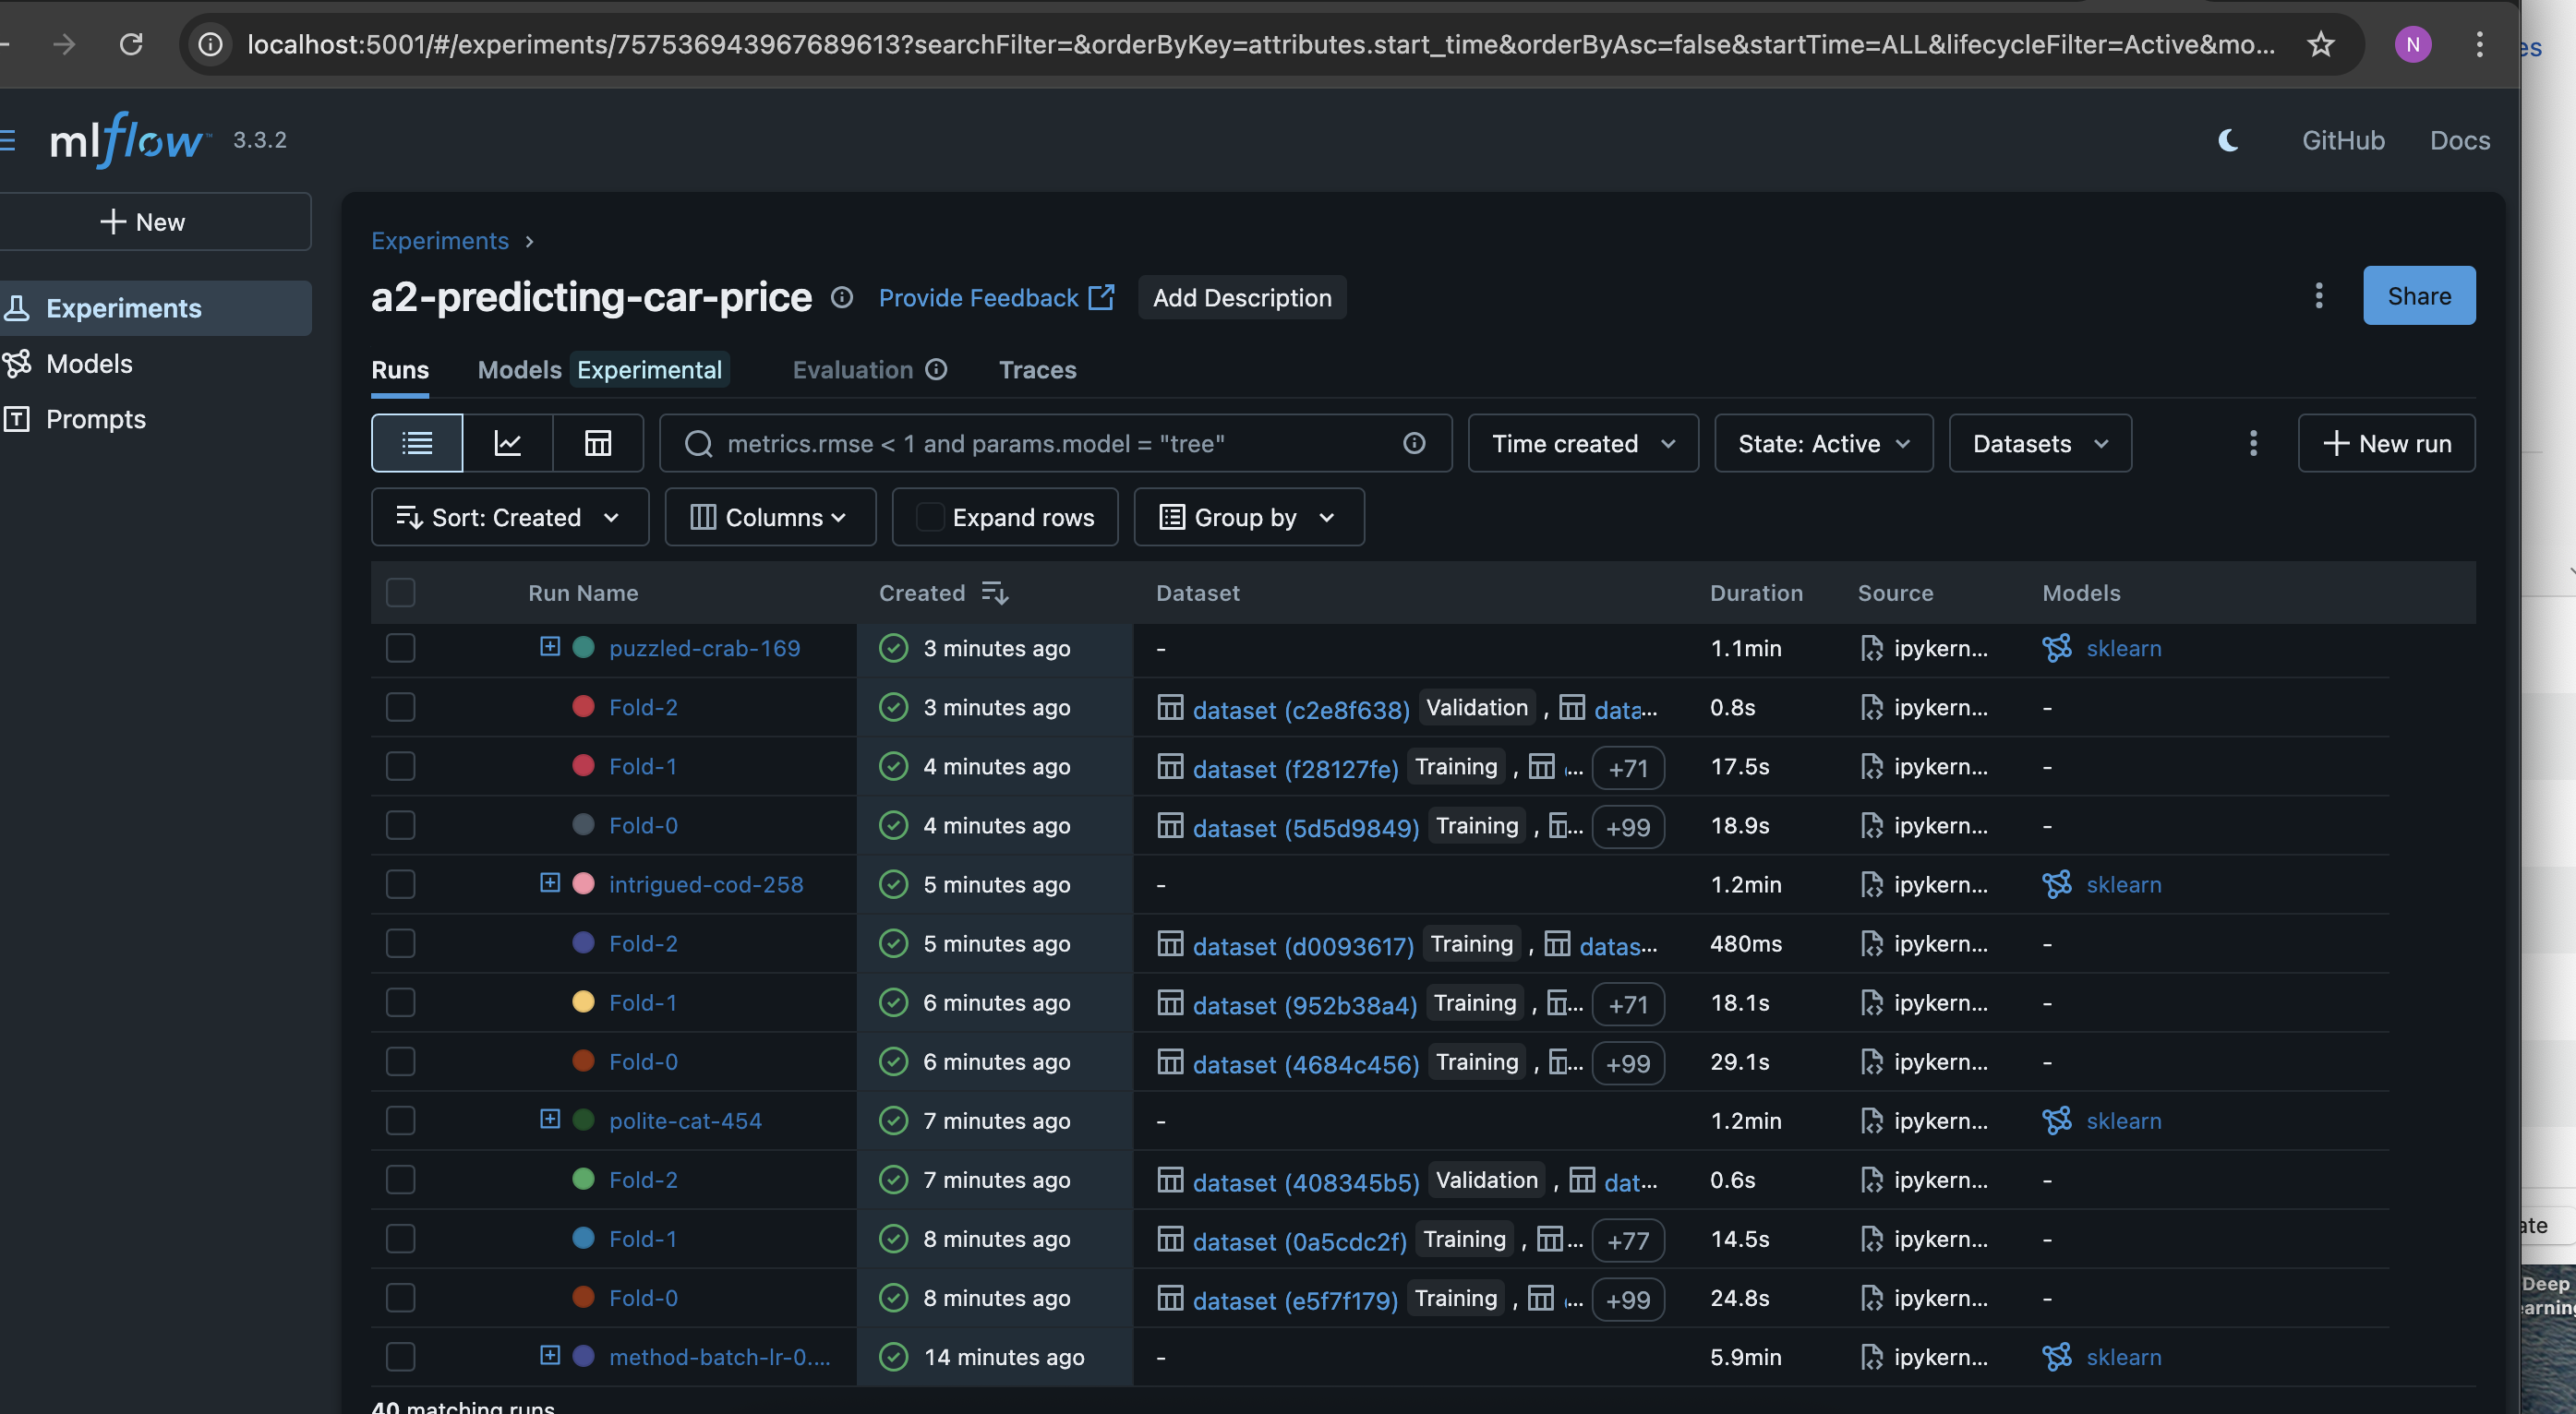

## Finding:
After thorough testing, the best results were achieved using the Normal model with the following configuration:
- Linear feature transformation
- Xavier initialization
- Stochastic batch gradient descent for optimization
- Momentum enabled
-Learning rate set to 0.01

## Learning Rate Selection
Out of the three learning rates tested (0.01, 0.001, and 0.0001), the value of 0.01 produced the most favorable results. Several factors may explain its effectiveness:
Convergence Speed: The higher rate of 0.01 enabled faster convergence, which reduced overall training time.
Escaping Local Minima: A larger step size allowed the model to move past local minima and navigate the loss surface more effectively.
Gradient Noise: Smaller rates such as 0.001 and 0.0001 tended to cause noisy parameter updates, slowing convergence and increasing the risk of getting stuck.
Data Scaling: Since the dataset was well-scaled, a higher learning rate proved to be more appropriate.

### Feature Transformation (Linear vs. Polynomial)
It is assumed that linear feature transformation was better suited for this task, as it captures a direct linear relationship between the input variables and car selling prices. In contrast, polynomial transformations introduce complex higher-order interactions, which, if not carefully managed, could result in overfitting.

### Initialization (Xavier vs. zero)
In this experiment, Xavier initialization proved to be the more effective approach. Unlike zero initialization, which assigns the same starting value to all weights, Xavier initialization draws weights from a normal distribution, helping maintain balanced variance across layers. This provided better starting conditions for training, allowing the model to converge more efficiently and achieve stronger performance.

### Stochastic Gradient Descent vs. Mini-Batch and Batch Gradient Descent
Through extensive testing, Stochastic Gradient Descent (SGD) was found to perform better than both Mini-Batch and Batch Gradient Descent for this task. The reasons for selecting SGD include:
- Faster Convergence: Since SGD updates weights after each data point, it allows the model to converge more quickly, particularly with large datasets.
- Adaptability: The randomness introduced by shuffling data points helps SGD escape local minima and saddle points more effectively.
- Implicit Regularization: The noise from frequent updates provides a regularizing effect, reducing the risk of overfitting.
- Improved Generalization: Its randomness and adaptability often lead to better performance on unseen data.
- Efficiency: Unlike full Batch Gradient Descent, which is computationally intensive on large datasets, SGD offers a more practical solution.

### Momentum vs. No Momentum
Momentum was selected as the preferred optimization method because of its effectiveness in stabilizing and speeding up training. It was found to smooth gradient updates, accelerate convergence, and assist the model in escaping local minima, leading to consistently better performance. When combined with stochastic gradient descent, momentum proved especially practical for large datasets, ultimately enhancing the overall results of the study.

| Model       | Best Avg R-squared (R²) | Best MSE  |
|:----------- |:------------------------:|---------:|
| Ridge       | -2                      | 4         |
| Lasso       | 0.71                    | 0.14      |
| Elastic Net | 0.04                    | 0.69      |
| **Normal**  | **0.88**                | **0.07**  |

## Conclusiont:
This study, we evaluated multiple machine learning models and configurations to predict car selling prices using a dataset containing various vehicle features. Following extensive experimentation, the Normal model—configured with linear feature transformation, Xavier initialization, stochastic batch gradient descent with momentum, and a learning rate of 0.01—emerged as the top performer, achieving an R-squared (R²) of 0.88 and a Mean Squared Error (MSE) of 0.07.

The choice of learning rate was a key factor in these results, with 0.01 proving most effective for this task. While further fine-tuning could enhance performance, these findings establish a solid foundation for predictive modeling in this context.